# Extracting Resonance Parameter Covariances from an ENDF file

The covariance file has the same hierarchy as MF2: Section, Isotope, Energy range

## Reich-Moore with General Resolved Resonance Formats (LCOMP = 1)

In [1]:
import ENDFtk

Pb208_tape = ENDFtk.tree.Tape.from_file( 'resources/n-Pb208.endf' )
Pb208_mat = Pb208_tape.materials.front()

Pb208_file32 = Pb208_mat.file(32).parse()
Pb208_section151 = Pb208_file32.section(151)
Pb208_resonance_region = Pb208_section151.isotopes[0]

Pb208_resonance_region

In [2]:
print(f"ZA of this isotope (ZAI): {Pb208_resonance_region.ZAI}")
print(f"number of resonance ranges (NER): {Pb208_resonance_region.number_resonance_ranges}")

ZA of this isotope (ZAI): 82208.0
number of resonance ranges (NER): 1


The RRR is the first range

In [3]:
Pb208_RRR = Pb208_resonance_region.resonance_ranges[0]
Pb208_RRR

In [4]:
print(f"Resonance range limits: {Pb208_RRR.lower_energy:.1E} - {Pb208_RRR.upper_energy:.1E} eV")
print(f"Type (LRU): {Pb208_RRR.type}")
print(f"Representation (LRF): {Pb208_RRR.representation}")
print(f"Energy-dependent scattering radius: {Pb208_RRR.energy_dependent_scattering_radius}")
print(f"Scattering radius calculation method (NAPS): {Pb208_RRR.scattering_radius_calculation_option}")

Resonance range limits: 1.0E-05 - 1.5E+06 eV
Type (LRU): 1
Representation (LRF): 3
Energy-dependent scattering radius: False
Scattering radius calculation method (NAPS): 1


The parameters and covariance matrices are in the `parameters` attribute

In [5]:
Pb208_parameters = Pb208_RRR.parameters
Pb208_parameters

In [6]:
print(f"Target spin (SPI): {Pb208_parameters.spin}")
print(f"RMatrix formalism (LRF): {Pb208_parameters.representation}")
print(f"Covariance representation (LCOMP): {Pb208_parameters.covariance_representation}")
print(f"Scattering radius (AP): {Pb208_parameters.scattering_radius}")
print(f"There is scattering radius uncertainty (ISR): {Pb208_parameters.scattering_radius_uncertainty_flag}")
print(f"Number of short-range covariance blocks (NSRS): {Pb208_parameters.number_short_range_blocks}")
print(f"Number of long-range covariance blocks (NLRS): {Pb208_parameters.number_long_range_blocks}")

Target spin (SPI): 0.0
RMatrix formalism (LRF): 3
Covariance representation (LCOMP): 1
Scattering radius (AP): 0.975
There is scattering radius uncertainty (ISR): True
Number of short-range covariance blocks (NSRS): 1
Number of long-range covariance blocks (NLRS): 0


If there is scattering radius uncertainty, it is in the `scattering_radius_uncertainty` attribute

In [7]:
Pb208_radius_unc = Pb208_parameters.scattering_radius_uncertainty
Pb208_radius_unc

In [8]:
print(f"The default radius uncertainty (DAP): {Pb208_radius_unc.default_uncertainty}")
print(f"The l-dependent radius uncertainties (DAPL): {Pb208_radius_unc.uncertainties[:]}")

The default radius uncertainty (DAP): 0.027
The l-dependent radius uncertainties (DAPL): [0.0, 0.0027]


If there are short-range covariance blocks, the format is dependent on the RMatrix formalism used. For Reich-Moore, the parameters from File 2 are repeated along with the covariance matrix as an upper-triangular matrix.

In [9]:
Pb208_short_range = Pb208_parameters.short_range_blocks[0]
Pb208_short_range

In [10]:
print(f"Number of resonances (NRB): {Pb208_short_range.number_resonances}")
print(f"For each resonances, number of parameters with covariances (MPAR): {Pb208_short_range.number_parameters_with_covariances}")
print(f"Covariance matrix order (NPARB): {Pb208_short_range.covariance_matrix_order}   (which equals NRB*MPAR)")
print(f"Number of values in the upper-triangular matrix (NVS): {Pb208_short_range.number_values}   (which equals NPARB * (NPARB + 1) / 2)")

Number of resonances (NRB): 152
For each resonances, number of parameters with covariances (MPAR): 3
Covariance matrix order (NPARB): 456   (which equals NRB*MPAR)
Number of values in the upper-triangular matrix (NVS): 104196   (which equals NPARB * (NPARB + 1) / 2)


The parameters with uncertainties (for all spin groups) are included:

In [11]:
print(f"Energy [eV] \t J \t Gamma_n \t Gamma_g \t Gamma_f1 \t Gamma_f2")
print("-"*82)
for Er, J, n, g, f1, f2 in zip(Pb208_short_range.resonance_energies,
                               Pb208_short_range.spin_values, 
                               Pb208_short_range.neutron_widths, 
                               Pb208_short_range.gamma_widths, 
                               Pb208_short_range.first_fission_widths, 
                               Pb208_short_range.second_fission_widths):
    print(f"{Er:.2E} \t {J} \t {n}    \t {g}    \t {f1}   \t         {f2}")

Energy [eV] 	 J 	 Gamma_n 	 Gamma_g 	 Gamma_f1 	 Gamma_f2
----------------------------------------------------------------------------------
-1.91E+06 	 0.5 	 273070.0    	 0.0914    	 0.0   	         0.0
5.06E+05 	 0.5 	 53590.0    	 0.166    	 0.0   	         0.0
8.88E+05 	 0.5 	 5490.0    	 0.166    	 0.0   	         0.0
9.98E+05 	 0.5 	 2653.99    	 0.166    	 0.0   	         0.0
1.07E+06 	 0.5 	 4322.564    	 0.166    	 0.0   	         0.0
1.11E+06 	 0.5 	 2680.318    	 0.166    	 0.0   	         0.0
1.24E+06 	 0.5 	 1157.726    	 0.00186    	 0.0   	         0.0
1.36E+06 	 0.5 	 616.568    	 0.00186    	 0.0   	         0.0
8.00E+06 	 0.5 	 445770.0    	 0.166    	 0.0   	         0.0
-4.00E+06 	 0.5 	 5009300.0    	 0.286    	 0.0   	         0.0
-4.00E+06 	 1.5 	 6681200.0    	 0.286    	 0.0   	         0.0
7.12E+04 	 1.5 	 101.0    	 0.0124    	 0.0   	         0.0
7.82E+04 	 1.5 	 958.0    	 0.125    	 0.0   	         0.0
8.66E+04 	 0.5 	 75.4    	 0.0152    	 0.0   	       

And the covariance matrix is presented as an upper-triangular matrix in list form

In [12]:
Pb208_short_range.covariance_matrix[:10]

[2924567000.0,
 -209010600.0,
 -1.63033e-07,
 889149.2,
 9105910.0,
 -0.0001006404,
 -106941.9,
 522641.9,
 -1.645508e-05,
 -86621.67]

The list can be converted to a full symmetric matrix using numpy functions:

In [13]:
import numpy as np

def fill_in_matrix(upper_triangular_list, matrix_order):

    # check that the inputs are consistent
    if not len(upper_triangular_list) == matrix_order * (matrix_order + 1) / 2:
        raise ValueError(f"The length of the matrix elements is not consistent with the stated matrix order")

    # create empty matrix
    covariance_matrix = np.zeros((matrix_order, matrix_order))

    # get the indices of the upper triangular values
    indices = np.triu_indices(matrix_order)

    # fill in the matrix
    covariance_matrix[indices] = upper_triangular_list

    # fill in the lower triangle
    covariance_matrix += np.triu(covariance_matrix,k=1).T

    return covariance_matrix

cov = fill_in_matrix(Pb208_short_range.covariance_matrix, Pb208_short_range.covariance_matrix_order)

print(cov[:5,:5])

[[ 2.924567e+09 -2.090106e+08 -1.630330e-07  8.891492e+05  9.105910e+06]
 [-2.090106e+08  1.561130e+07  1.139183e-08 -6.205434e+04 -6.343295e+05]
 [-1.630330e-07  1.139183e-08  7.518564e-06  3.434780e-10  9.633060e-10]
 [ 8.891492e+05 -6.205434e+04  3.434780e-10  1.326866e+05  1.747955e+05]
 [ 9.105910e+06 -6.343295e+05  9.633060e-10  1.747955e+05  9.257178e+05]]


The order of the covariance matrix is the set of resonance parameters for each resonance:

$$
ER_1, GN_1, GG_1, GFA_1, GFB_1, ER_2, GN_2, GG_2, GFA_2, GFB_2, ..., ER_{NRB}, GN_{NRB}, GG_{NRB}, GFA_{NRB}, GFB_{NRB}
$$

where $NRB$ is the number of resonances with uncertainty. In this case the fission widths are not included, which is indicated by the fact that the flag MPAR (for each resonances, number of parameters with covariances) is 3


This list can be created in Python with zip and sum:

In [14]:
# this creates a tuple
parameter_list = sum(
    zip(
        Pb208_short_range.resonance_energies,
        Pb208_short_range.neutron_widths,
        Pb208_short_range.gamma_widths,
        # Pb208_short_range.first_fission_widths,   # not included here because MPAR = 3
        # Pb208_short_range.second_fission_widths   # not included here because MPAR = 3
        ),
        ()
)

parameter_list = np.array(parameter_list)
parameter_list

array([-1.910000e+06,  2.730700e+05,  9.140000e-02,  5.060000e+05,
        5.359000e+04,  1.660000e-01,  8.882000e+05,  5.490000e+03,
        1.660000e-01,  9.980585e+05,  2.653990e+03,  1.660000e-01,
        1.072400e+06,  4.322564e+03,  1.660000e-01,  1.109920e+06,
        2.680318e+03,  1.660000e-01,  1.243798e+06,  1.157726e+03,
        1.860000e-03,  1.363123e+06,  6.165680e+02,  1.860000e-03,
        8.000000e+06,  4.457700e+05,  1.660000e-01, -4.000000e+06,
        5.009300e+06,  2.860000e-01, -4.000000e+06,  6.681200e+06,
        2.860000e-01,  7.121000e+04,  1.010000e+02,  1.240000e-02,
        7.825000e+04,  9.580000e+02,  1.250000e-01,  8.656000e+04,
        7.540000e+01,  1.520000e-02,  1.172200e+05,  3.170000e+02,
        2.700000e-02,  1.532500e+05,  1.050000e+01,  2.860000e-01,
        1.635000e+05,  8.200000e+00,  2.860000e-01,  1.685300e+05,
        2.840000e+01,  2.860000e-01,  2.779900e+05,  3.150000e+02,
        1.680000e-01,  3.242300e+05,  1.350000e+02,  5.000000e

from this the relative uncertainties can be determined:

In [15]:
relative_uncertainties = np.sqrt(np.diag(cov)) / parameter_list

Text(0.5, 0, 'Relative Uncertainty [%]')

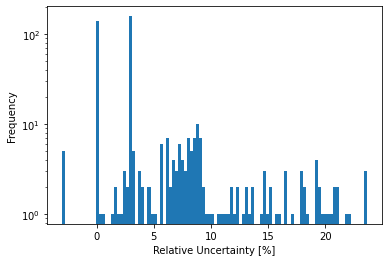

In [16]:
import matplotlib.pyplot as plt

_  = plt.hist(100*relative_uncertainties,bins = 100)
plt.ylabel("Frequency")
plt.yscale("log")
plt.xlabel("Relative Uncertainty [%]")

## R-Matrix Limited with Resolved Resonance Compact Covariance Format  (LCOMP = 2)

In [17]:

Rh103_tape = ENDFtk.tree.Tape.from_file( 'resources/n-Rh103.endf' )
Rh103_mat = Rh103_tape.materials.front()

Rh103_file32 = Rh103_mat.file(32).parse()
Rh103_section151 = Rh103_file32.section(151)
Rh103_resonance_region = Rh103_section151.isotopes[0]

Rh103_resonance_region

In [18]:
print(f"ZA of this isotope (ZAI): {Rh103_resonance_region.ZAI}")
print(f"number of resonance ranges (NER): {Rh103_resonance_region.number_resonance_ranges}")

ZA of this isotope (ZAI): 45103.0
number of resonance ranges (NER): 2


The RRR is the first region

In [19]:
Rh103_RRR = Rh103_resonance_region.resonance_ranges[0]
Rh103_RRR

In [20]:
print(f"Resonance range limits: {Rh103_RRR.lower_energy:.1E} - {Rh103_RRR.upper_energy:.1E} eV")
print(f"Type (LRU): {Rh103_RRR.type}")
print(f"Representation (LRF): {Rh103_RRR.representation}")
print(f"Energy-dependent scattering radius: {Rh103_RRR.energy_dependent_scattering_radius}")
print(f"Scattering radius calculation method (NAPS): {Rh103_RRR.scattering_radius_calculation_option}")

Resonance range limits: 1.0E-05 - 8.0E+03 eV
Type (LRU): 1
Representation (LRF): 7
Energy-dependent scattering radius: False
Scattering radius calculation method (NAPS): 1


The parameters and covariance matrices are in the `parameters` attribute

In [21]:
Rh103_parameters = Rh103_RRR.parameters
Rh103_parameters

In [22]:
print(f"RMatrix formalism (LRF): {Rh103_parameters.representation}")
print(f"Covariance representation (LCOMP): {Rh103_parameters.covariance_representation}")
print(f"There is scattering radius uncertainty (ISR): {Rh103_parameters.scattering_radius_uncertainty_flag}")
print(f"The scattering radius uncertainty (DAP): { Rh103_parameters.scattering_radius_uncertainty }")
print(f"The widths are in units [eV^1/2] instead of [eV] (IFG): {Rh103_parameters.reduced_widths}")
print(f"The number of spin groups (NJS): {Rh103_parameters.number_spin_groups}")

RMatrix formalism (LRF): 7
Covariance representation (LCOMP): 2
There is scattering radius uncertainty (ISR): False
The scattering radius uncertainty (DAP): None
The widths are in units [eV^1/2] instead of [eV] (IFG): False
The number of spin groups (NJS): 5


The parameters and uncertainties are in the `uncertainties` attribute

In [23]:
Rh103_uncertainties = Rh103_parameters.uncertainties
Rh103_uncertainties

In [24]:
print(f"Number of spin groups (NJSX): {Rh103_uncertainties.number_spin_groups}")

Number of spin groups (NJSX): 5


The particle pair information is repeated in `particle_pairs`, and the parameters are in the `spin_groups` attribute

In [25]:
Rh103_swave = Rh103_uncertainties.spin_groups[0]
Rh103_swave

In [26]:
print(f"Number of channels (NCH): {Rh103_swave.number_channels}")
print(f"Number of resonances (NRSA): {Rh103_swave.number_resonances}")
print(f"Spin of this group (AJ): {Rh103_swave.spin}")
print(f"Parity of this group (PJ): {Rh103_swave.parity}")

Number of channels (NCH): 2
Number of resonances (NRSA): 46
Spin of this group (AJ): 0.0
Parity of this group (PJ): 1.0


In [27]:
Rh103_swave_parameters = Rh103_swave.parameters
Rh103_swave_parameters

In [28]:
print(f"Number of resonances (NRSA): {Rh103_swave_parameters.number_resonances}")

Number of resonances (NRSA): 46


The energies and their uncertainties are in `resonance_energies` and `resonance_energy_uncertainties`:

In [29]:
for En, dEn in zip(Rh103_swave_parameters.resonance_energies, Rh103_swave_parameters.resonance_energy_uncertainties):
    print(f'{En} +/-  {dEn} eV')

-1491.814 +/-  1.252109 eV
46.82268 +/-  0.02053706 eV
95.70722 +/-  0.02398251 eV
154.2556 +/-  0.0175945 eV
327.8924 +/-  0.09490174 eV
486.7711 +/-  0.07635782 eV
797.0398 +/-  0.09201471 eV
914.4677 +/-  0.04663274 eV
955.6727 +/-  0.07010272 eV
1196.683 +/-  0.0495942 eV
1737.123 +/-  0.1143042 eV
1905.183 +/-  0.1088354 eV
1982.909 +/-  0.06258818 eV
2060.281 +/-  0.09326301 eV
2115.966 +/-  0.07280334 eV
2315.932 +/-  0.1100444 eV
2882.044 +/-  0.1238535 eV
2998.536 +/-  0.1027436 eV
3272.894 +/-  0.1048641 eV
3396.083 +/-  0.112914 eV
3491.836 +/-  0.1240632 eV
4062.233 +/-  0.5464617 eV
5023.192 +/-  0.3160872 eV
5061.07 +/-  0.3655067 eV
5089.144 +/-  0.448051 eV
5256.611 +/-  0.622064 eV
5318.717 +/-  0.3794795 eV
5345.88 +/-  0.5941795 eV
5397.327 +/-  4.058933 eV
5473.58 +/-  0.2437662 eV
5511.772 +/-  0.595882 eV
5788.224 +/-  0.7703145 eV
5811.787 +/-  0.478311 eV
5911.925 +/-  0.5298276 eV
6057.257 +/-  0.4604669 eV
6070.839 +/-  0.5005679 eV
6140.399 +/-  0.3573837 eV


The resonance parameters are in the analogous attributes:

In [30]:
Rh103_swave_parameters.resonance_parameters[0][:], Rh103_swave_parameters.resonance_parameter_uncertainties[0][:]

([0.1816456, 2.322584, 0.0, 0.0, 0.0], [0.1748601, 0.1332574, 0.0, 0.0, 0.0])

The lists of values and uncertainties can be assembled with numpy arrays:

In [31]:
parameter_values = np.array(Rh103_swave_parameters.resonance_parameters).T
parameter_values = np.vstack([Rh103_swave_parameters.resonance_energies,parameter_values]).T
parameter_values = parameter_values.reshape((parameter_values.shape[0]*parameter_values.shape[1]))
parameter_values[:10]

array([-1.491814e+03,  1.816456e-01,  2.322584e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  4.682268e+01,  1.747914e-01,
        1.745071e-03,  0.000000e+00])

In [32]:
parameter_uncertainties = np.array(Rh103_swave_parameters.resonance_parameter_uncertainties).T
parameter_uncertainties = np.vstack([Rh103_swave_parameters.resonance_energy_uncertainties,parameter_uncertainties]).T
parameter_uncertainties = parameter_uncertainties.reshape((parameter_uncertainties.shape[0]*parameter_uncertainties.shape[1]))
parameter_uncertainties[:10]

array([1.252109e+00, 1.748601e-01, 1.332574e-01, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 2.053706e-02, 3.038187e-02,
       2.162843e-04, 0.000000e+00])

from this, the relative uncertainties can be obtained:

In [33]:
Rh103_relative_uncertainties = parameter_uncertainties / np.abs(parameter_values)
Rh103_relative_uncertainties[:10]

<ipython-input-33-d5467f9399ce>:1: RuntimeWarning: invalid value encountered in true_divide
  Rh103_relative_uncertainties = parameter_uncertainties / np.abs(parameter_values)


array([8.39319781e-04, 9.62644292e-01, 5.73746310e-02,            nan,
                  nan,            nan, 4.38613510e-04, 1.73817877e-01,
       1.23940115e-01,            nan])

In this format, the correlation matrix is stored rather than the covariance matrix

In [34]:
Rh103_correlation_object = Rh103_parameters.correlation_matrix
Rh103_correlation_object

In [35]:
print(f"The order of the correlation matrix (NNN): {Rh103_correlation_object.order}")
print(f"The number of digits used for each correlation value (NDIGIT): {Rh103_correlation_object.number_digits}")

The order of the correlation matrix (NNN): 1823
The number of digits used for each correlation value (NDIGIT): 2


The indices are stored in the attributes `I` and `J`, and the correlation values are in `correlations`

In [36]:
row_indices = np.array(Rh103_correlation_object.I) - 1  # Values are 1-indexed
col_indices = np.array(Rh103_correlation_object.J) - 1  # Values are 1-indexed
values = np.array(Rh103_correlation_object.correlations)

row_indices[0], col_indices[0], values[0]

(4, 1, -0.025)

the correlation matrix can be constructed from these indices and values:

In [37]:
Rh103_correlation_matrix = np.zeros((Rh103_correlation_object.order,Rh103_correlation_object.order))

Rh103_correlation_matrix[row_indices,col_indices] = values

# fill in the upper triangle
Rh103_correlation_matrix += np.tril(Rh103_correlation_matrix,k=1).T

# add ones along the diagonal
Rh103_correlation_matrix += np.identity(Rh103_correlation_object.order)

Rh103_correlation_matrix[:6,:6]

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   , -0.025,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   , -0.025,  0.   ],
       [ 0.   , -0.025,  0.   , -0.025,  1.   , -0.595],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.595,  1.   ]])

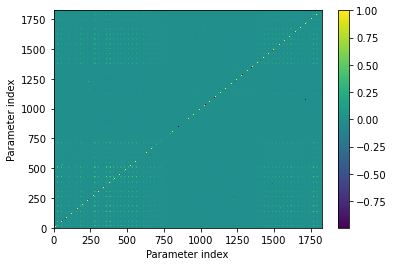

In [38]:
# this takes a little while to produce

plt.pcolor(Rh103_correlation_matrix)
plt.xlabel("Parameter index")
plt.ylabel("Parameter index")
plt.colorbar()

The covariance matrix can be constructed from the uncertainties and the correlation matrix. The parameters for each spin group need to be collected into the parameter and uncertainty arrays:

In [39]:
Rh103_parameter_values = np.array([])
Rh103_parameter_uncertainties = np.array([])

for spin_group in Rh103_uncertainties.spin_groups:

    parameter_values = np.array(spin_group.parameters.resonance_parameters).T
    parameter_values = parameter_values[:spin_group.NCH,:]  # grab only the number of channels indicated by NCH
    parameter_values = np.vstack([spin_group.parameters.resonance_energies,parameter_values]).T
    parameter_values = parameter_values.reshape((parameter_values.shape[0]*parameter_values.shape[1]))

    Rh103_parameter_values = np.append(Rh103_parameter_values, parameter_values)

    parameter_uncertainties = np.array(spin_group.parameters.resonance_parameter_uncertainties).T
    parameter_uncertainties = parameter_uncertainties[:spin_group.NCH,:]  # grab only the number of channels indicated by NCH
    parameter_uncertainties = np.vstack([spin_group.parameters.resonance_energy_uncertainties,parameter_uncertainties]).T
    parameter_uncertainties = parameter_uncertainties.reshape((parameter_uncertainties.shape[0]*parameter_uncertainties.shape[1]))

    Rh103_parameter_uncertainties = np.append(Rh103_parameter_uncertainties, parameter_uncertainties)



Rh103_parameter_values.shape, Rh103_parameter_uncertainties.shape

((1823,), (1823,))

In [40]:
Rh103_covariance_matrix = np.diag(Rh103_parameter_uncertainties) @ Rh103_correlation_matrix @ np.diag(Rh103_parameter_uncertainties)

Rh103_covariance_matrix[3:6,3:6]

array([[ 4.21770833e-04, -1.55988572e-05,  0.00000000e+00],
       [-1.55988572e-05,  9.23058025e-04, -3.90981728e-06],
       [ 0.00000000e+00, -3.90981728e-06,  4.67788984e-08]])

check the first non-zero correlation value:

In [41]:
Rh103_covariance_matrix[4,1]

-0.000132814420659675

In [42]:
Rh103_parameter_uncertainties[4] * Rh103_correlation_matrix[4,1] *  Rh103_parameter_uncertainties[1]

-0.000132814420659675

In [43]:
np.isclose(Rh103_covariance_matrix[4,1], Rh103_parameter_uncertainties[4] * Rh103_correlation_matrix[4,1] *  Rh103_parameter_uncertainties[1])

True